In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import pymc_bart as pmb

In [2]:
%config Completer.use_jedi = False
RANDOM_SEED = 8457
rng = np.random.RandomState(RANDOM_SEED)
az.style.use("arviz-white")
plt.rcParams["figure.dpi"] = 300

## Data generation

In [3]:
X = rng.uniform(low=0, high=1.0, size=(100, 10))
f_x = (
    10 * np.sin(np.pi * X[:, 0] * X[:, 1])
    + 20 * (X[:, 2] - 0.5) ** 2
    + 10 * X[:, 3]
    + 5 * X[:, 4]
)
Y = rng.normal(f_x, 1)

In [4]:
idatas = {}
trees = [10, 20, 50, 100, 200]
VIs = []
for m in trees:
    with pm.Model() as model:
        μ = pmb.BART("μ", X, Y, m=m)
        σ = pm.HalfNormal("σ", 1)
        y = pm.Normal("y", μ, σ, observed=Y)
        idata = pm.sample(chains=4, random_seed=RANDOM_SEED)
        idatas[str(m)] = idata
        # Variable importance
        VI = idata.sample_stats["variable_inclusion"].mean(("chain", "draw")).values
        VIs.append(VI / VI.sum())

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 40 seconds.
The acceptance probability does not match the target. It is 0.9067, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 90 seconds.
The acceptance probability does not match the target. It is 0.9133, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 173 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 333 seconds.
The acceptance probability does not match the target. It is 0.8942, but should be close to 0.8. Try to increase the number of tuning steps.


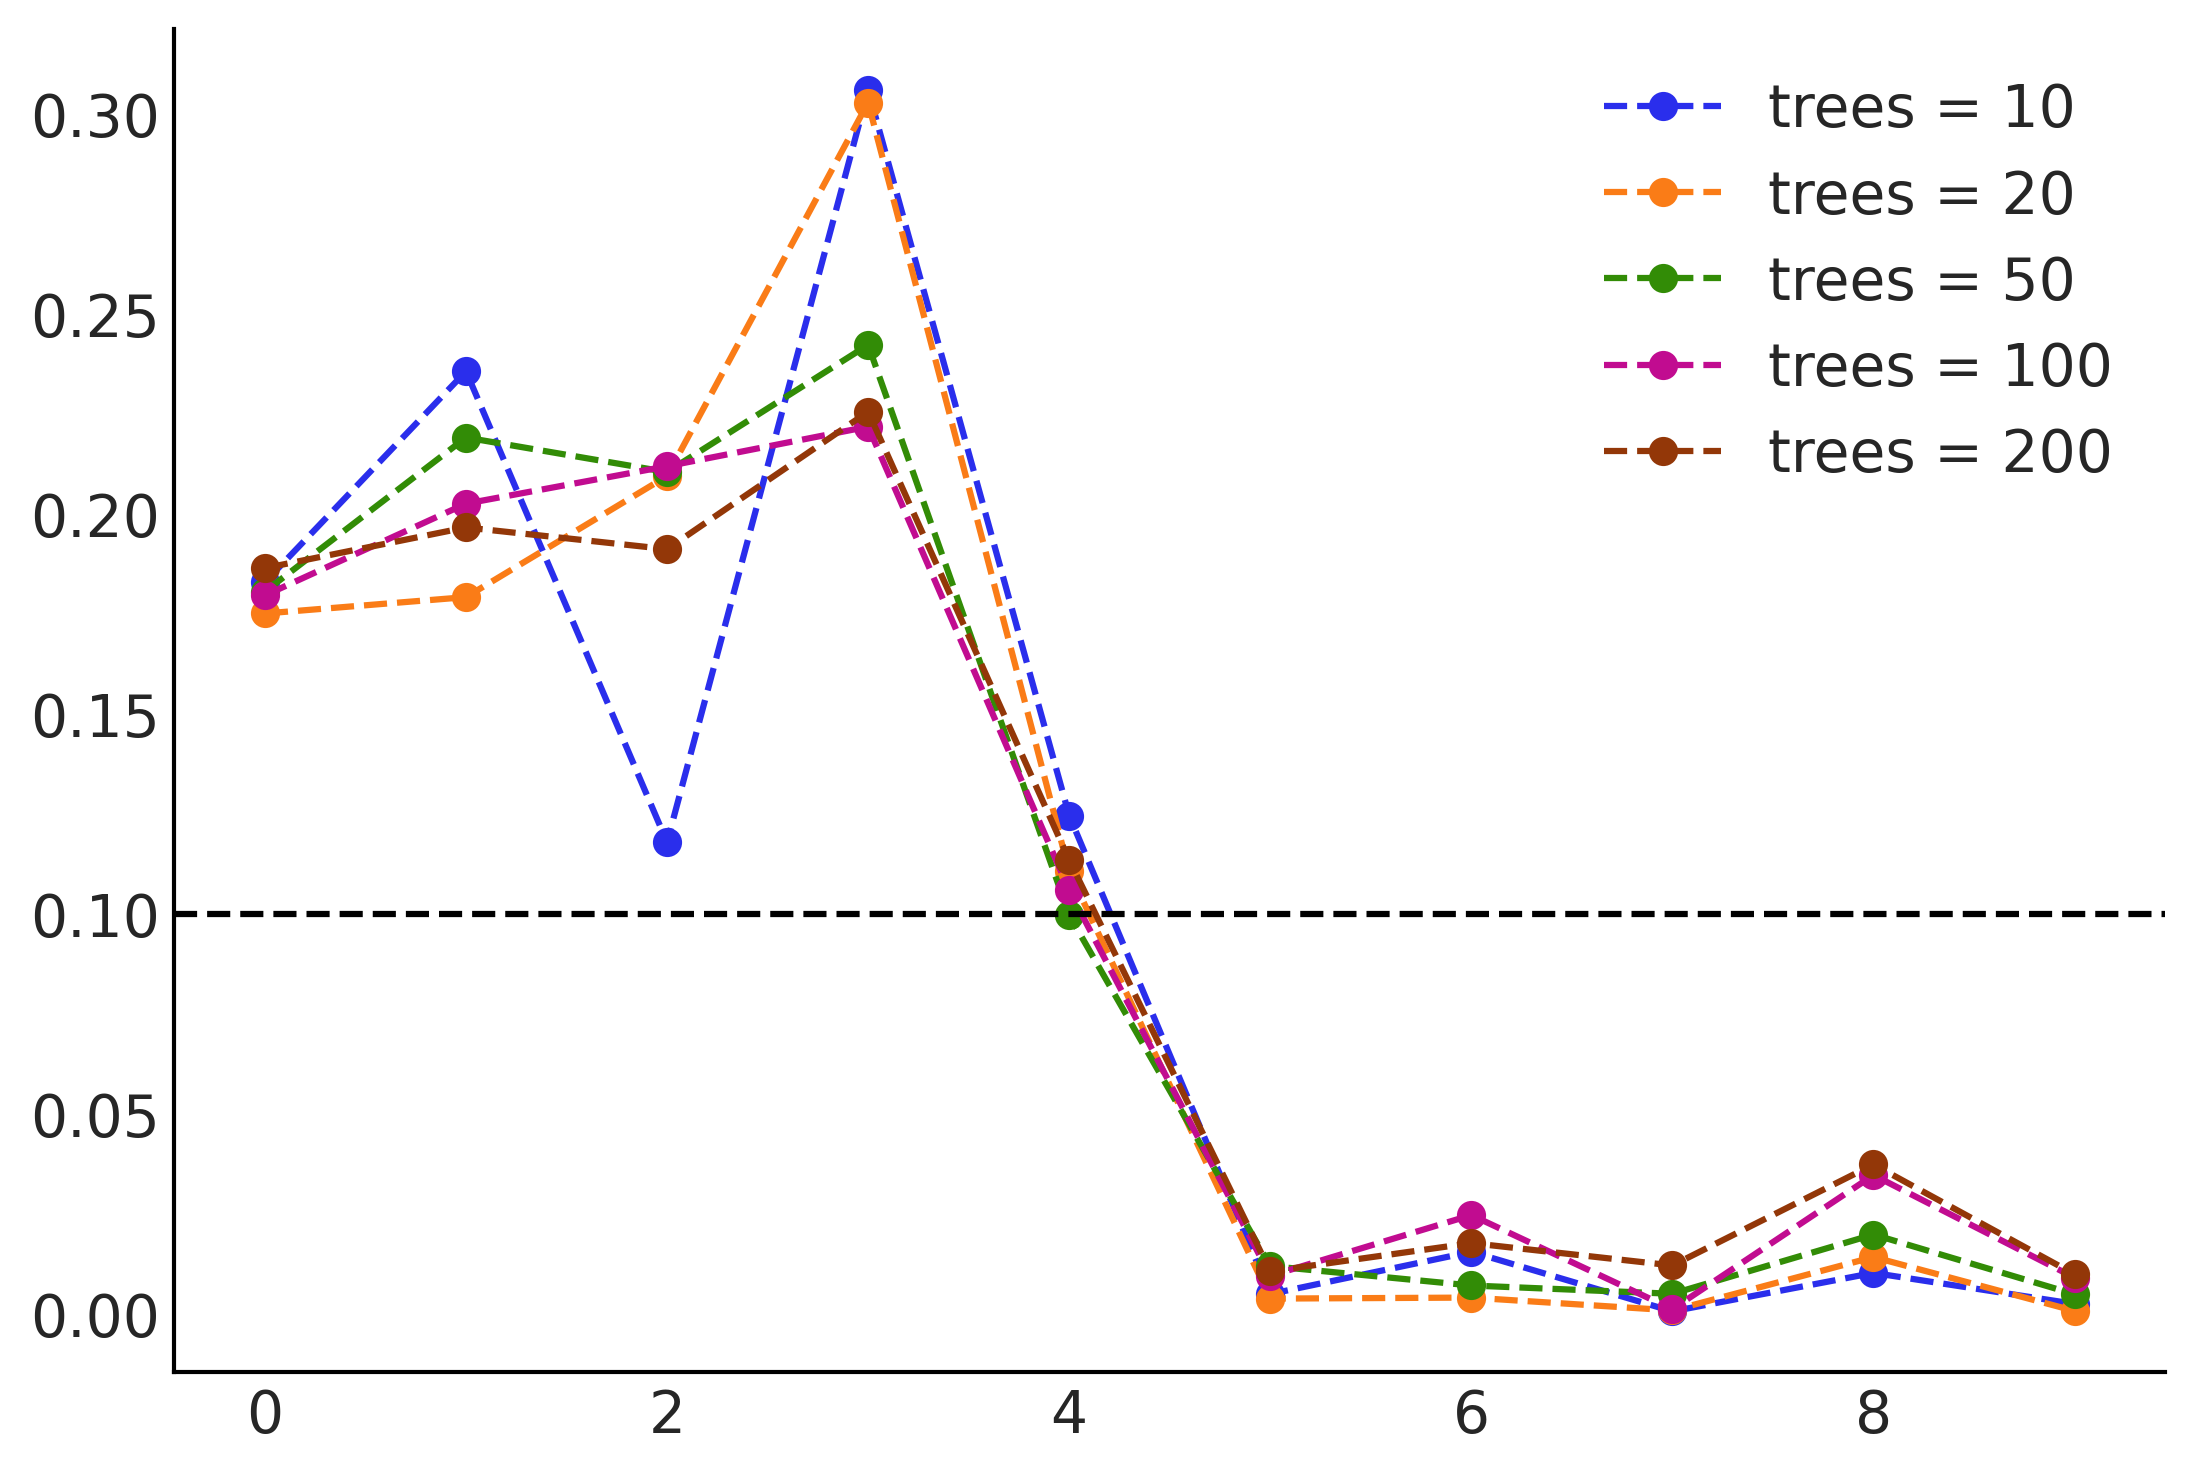

In [5]:
for tree, vi in zip(trees, VIs):
    plt.plot(vi, label=f"trees = {tree}", marker="o", linestyle="dashed")

plt.axhline(1 / X.shape[1], ls="--", color="k")
plt.legend()
plt.savefig("var_importance.png")